# Geração das WordClouds das descrições

Os dados gerados após o tratamento, objeto de estudo, estão contidos em um campo de descrição, onde o importador ou seu representante faz a entrada livre de dados, sem qualquer exigência ou padronização, nossa análise exploratória foi convincente no sentido de que deveria ser feito um tratamento com a utilização de Programação de Linguagem Natural – PLN.
Dentro dessa análise exploratória de dados, observou-se a ocorrência de palavras que, embora frequentes, serão irrelevantes para a determinação da diferenciação entre os itens que estão classificados dentro do agrupamento representado pela NCM em estudo.
Comum no estudo de categorização de textos, o uso de stopwords é recomendado nesse caso, pois da mesma forma que artigos, pronomes e outras palavras tradicionalmente identificadas como não relevantes para a distinção, termos como kit, transmissão, corrente, coroa e pinhão também são igualmente irrelevantes para distinguir um item de outro.
Na biblioteca Natural Language Processing Toolkit - nltk já existe uma lista de stopwords para a língua portuguesa. Como essa biblioteca já possui a funcionalidade de complementação dessa lista, adicionou-se os itens kit, transmissão, corrente, coroa e pinhão; termos que pela sua característica não distinguem os itens dentro do dataset estudado.

### Importa os dados já tratados

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importa base de dados para um dataframe
df = pd.read_excel('dataframe.xlsx')

In [3]:
# Verifica o tamnanho do dataframe
df.shape

(19092, 25)

In [4]:
# Mostra linhas de exemplo do dataframe
df.sample(5)

,NUMERO DE ORDEM,ANOMES,COD.NCM,DESCRICAO DO CODIGO NCM,PAIS.OR,PAIS DE ORIGEM,PAIS.AQ,PAIS DE AQUISICAO,UND.ESTAT.,UNIDADE DE MEDIDA,...,VL FRETE DOLAR,VL SEGURO DOLAR,VALOR UN.PROD.DOLAR,QTD COMERCIAL.,TOT.UN.PROD.DOLAR,UNIDADE DESEMBARQUE,UNIDADE DESEMBARACO,INCOTERM,NAT.INFORMACAO,SITUACAO DO DESPACHO
10285,1363940000200018,202011,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP",10,QUILOGRAMA LIQUIDO,...,2364.98,0.00,8.302000,540.0,4483.08000,N/INFORMADO,PORTO DE VITORIA,FOB,EFETIVA,DI DESEMBARAÇADA
12526,1497150000100009,202101,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP",10,QUILOGRAMA LIQUIDO,...,12300.00,0.00,1.536872,2500.0,3842.18000,N/INFORMADO,PORTO DE PARANAGUA,FOB,EFETIVA,DI DESEMBARAÇADA
3344,124890000300003,202006,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",767,SUICA,10,QUILOGRAMA LIQUIDO,...,1159.40,71.10,3.976400,800.0,3181.12000,N/INFORMADO,ITAJAI,FOB,EFETIVA,DI DESEMBARAÇADA
15069,803580000100015,202103,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP",10,QUILOGRAMA LIQUIDO,...,7650.00,0.00,2.087567,600.0,1252.54026,N/INFORMADO,ITAJAI,FOB,EFETIVA,DI DESEMBARAÇADA
2909,650970001200007,202005,87141000,PARTES ACESSÓRIOS P/MOTOCICLET,160,"CHINA, REPUBLICA POP",767,SUICA,10,QUILOGRAMA LIQUIDO,...,241.23,25.17,14.610000,200.0,2922.00000,N/INFORMADO,ITAJAI,FOB,EFETIVA,DI DESEMBARAÇADA


### Importa as stopwords da língua portuguesa

In [5]:
# Importar lista de Stopwords
from nltk.corpus import stopwords
#nltk.download('stopwords')
stopwords = set(stopwords.words('portuguese'))

In [6]:
# Mostra tamanho da lista de stopwords
len(stopwords)

204

In [7]:
# Mostra toda a lista de stopwords
swtemp = list(stopwords)
swtemp.sort()
print(swtemp)

['a', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'essa', 'essas', 'esse', 'esses', 'esta', 'estamos', 'estas', 'estava', 'estavam', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéramos', 'estivéssemos', 'estou', 'está', 'estávamos', 'estão', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'forem', 'formos', 'fosse', 'fossem', 'fui', 'fôramos', 'fôssemos', 'haja', 'hajam', 'hajamos', 'havemos', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houveram', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houvermos', 'houverá', 'houverão', 'houveríamos', 'houvesse', 'houvessem', 'houvéramos', 'houvéssemos', 'há', 'hão', 'isso', 'isto', 'já', 'lhe', 'lhes', '

### Instala a biblioteca wordcloud

In [8]:
# Caso já esteja instalada atualiza
!pip install wordcloud -q

### Importa as bibliotecas necessárias

In [9]:
import os
import string
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Cria a string contendo todas as descrições

In [10]:
# Mostra algumas descrições do dataset
df['DESCRICAO DO PRODUTO'].sample(5)

10231    KIT DE TRANSMISSAO , MARCA RIFFEL, TITANIUM (1...
250      KIT DE TRANSMISSAO P/ MOTOCICLETA MOD: NXR 160...
9621     - KIT TRANSMISSAO TITANIUM PARA MOTOCICLETAS M...
15313    KIT TRANSMISSÃO PARA MOTOCICLETAS,COMPOSTO DE ...
3275     80354 KIT DE TRANSMISSÃO, COMPOSTO DE CORRENTE...
Name: DESCRICAO DO PRODUTO, dtype: object

In [11]:
# Mescla todas as descrições como uma string usado espaço como separador
descricoes = " ".join(df['DESCRICAO DO PRODUTO']).lower()
# Cria um termo de definição para com ou sem retentor
descricoes = descricoes.replace('com retentor','comretentor').replace('sem retentor','semretentor')

### Gera a WodCloud aplicando o filtro das stopwords

In [12]:
# Define e gera a wordcloud para um máximo de 400 palavras de tamanho mínimo 2
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800,max_words=400,min_word_length=2).generate(descricoes)

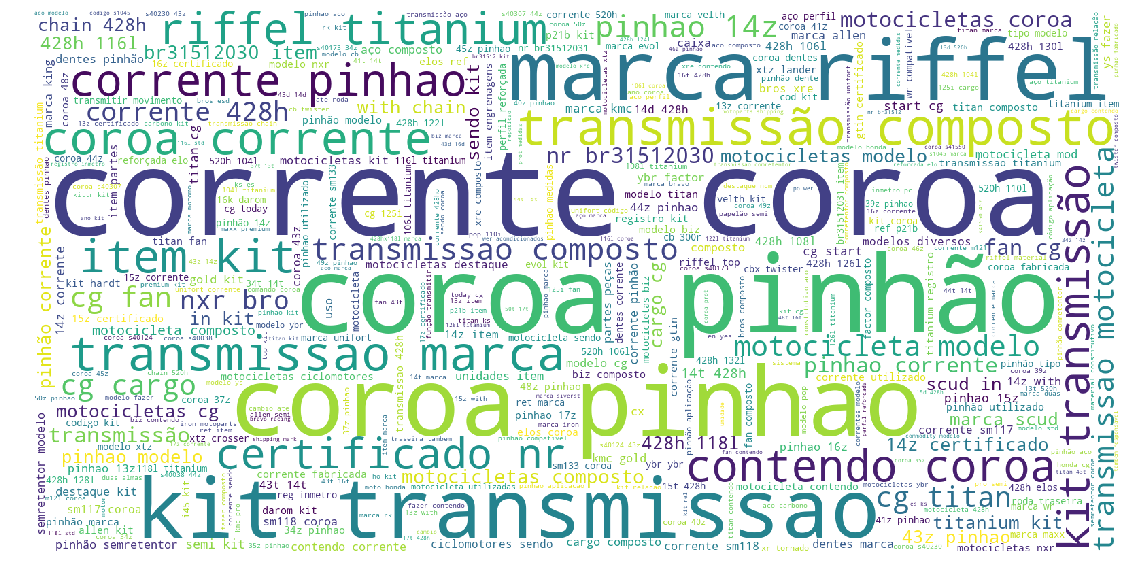

In [13]:
# Exibe a imagem da WordCloud gerada
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

In [14]:
# Exporta para um aquivo
wordcloud.to_file("wordcloud_descricoes_antes.png")

### Atualiza as stopwords contendo as palavras irrelevantes
Palavras a adicionar: kit, transmissao, transmissão, coroa, pinhao, pinhão

In [15]:
# Palavras a adicionar na lista de stopwords
stopwords_df = ["kit","transmissao","transmissão","corrente","coroa","pinhao","pinhão",
                "moto","motocicleta","motocicletas","composto","modelo","modelos","marca",
                "completo","completos","ciclomotores","contendo","certificado","item",
                "fabricado","fabricada","sendo","utilizado","utilizada","partes","peças",
                "engrenagem","engrenagens","dente","dentes","transmitir","movimento",
                "aço","aco","utilizados","utilizadas","compatível","compativel","serve",
                "destaque","destaques","diverso","diversos","relação","relacao","unidade",
                "traseira","também","tambem",
                "with","chain","iron","motoparts","part","parts"]

In [16]:
# Atualizar stopwords
stopwords.update(stopwords_df)

In [17]:
# Mostra toda a lista de stopwords
swtemp = list(stopwords)
swtemp.sort()
print(swtemp)

['a', 'aco', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'até', 'aço', 'certificado', 'chain', 'ciclomotores', 'com', 'como', 'compativel', 'compatível', 'completo', 'completos', 'composto', 'contendo', 'coroa', 'corrente', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'dente', 'dentes', 'depois', 'destaque', 'destaques', 'diverso', 'diversos', 'do', 'dos', 'e', 'ela', 'elas', 'ele', 'eles', 'em', 'engrenagem', 'engrenagens', 'entre', 'era', 'eram', 'essa', 'essas', 'esse', 'esses', 'esta', 'estamos', 'estas', 'estava', 'estavam', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéramos', 'estivéssemos', 'estou', 'está', 'estávamos', 'estão', 'eu', 'fabricada', 'fabricado', 'foi', 'fomos', 'for', 'fora', 'foram', 'forem', 'formos', 'fosse', 'fossem', 'fui', 'fôramos', 'fôssemos', 'haja', 'hajam', 'hajamos', 'havemos', 'hei',

### Gera a WodCloud aplicando o filtro das stopwords atualizado

In [18]:
# Define e gera a wordcloud para um máximo de 400 palavras de tamanho mínimo 2
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800,max_words=400,min_word_length=2).generate(descricoes)

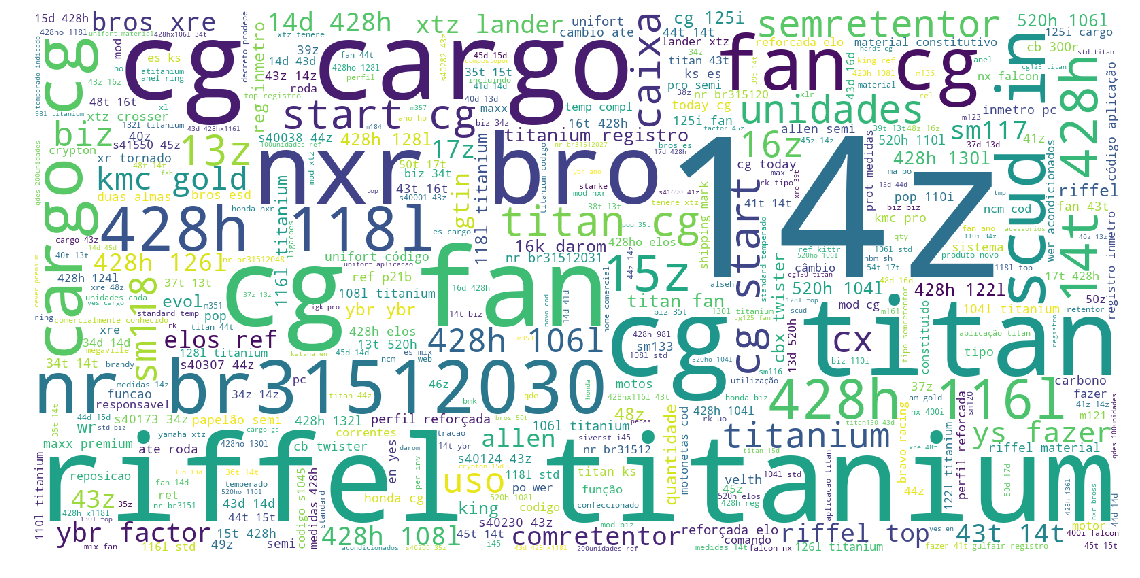

In [19]:
# Exibe a imagem da nova WordCloud gerada
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

In [20]:
# Exporta para um aquivo
wordcloud.to_file("wordcloud_descricoes_depois.png")